# Simulation

This is all the code for the simulation of the market, including the traders, the asset and the market mechanism.

In [1]:
# Import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pymarket
import networkx

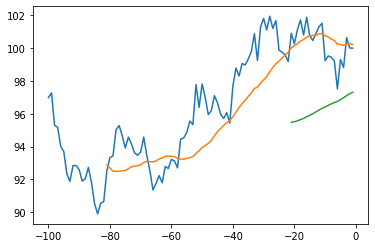

In [61]:
# Initialise the trading asset, as well as t previous random prices so that the technical analyst traders have some
# material to use to make their inital trading decisions. These random prices will be kept constant throughout the
# simulations so they don't affect the decisions of the traders between rounds. The price at t=0 will be 100 so price
# movements during the simulation are normalised to an index.

rm = 0.1 #Return on the market portfolio
rf = 0.02 #Return on the risk free asset

t = 100
period = []
start = -t

for i in range(t):
    period.append(start)
    start += 1
    
# asset_prices_rev = []
# price = 100

# for i in range(t):
    # asset_prices_rev.append(price)
    # price = price + np.random.normal(loc=-0.09, scale=1.0, size=None)
    
asset_prices_rev_final = [100, 100.01270443267846, 100.64019372161697, 98.81839318571531, 99.30899479777956, 
                          97.51859080046586, 99.22427385535754, 99.44545557876086, 99.52622326159883, 
                          99.23209122576705, 101.52132601414174, 101.30141646048006, 100.89710059388699, 
                          100.46473999622577, 100.75961538456453, 101.88499554537094, 100.80411278857896, 
                          101.72248034025961, 101.12565566539686, 100.26632483034365, 100.91562712976665, 
                          99.17772539309188, 99.59066814732586, 99.75049301170291, 99.88257405096272, 
                          101.67780729403768, 101.20291667999382, 101.94670634215417, 101.10767031065018, 
                          101.81291988910793, 101.30365747376271, 99.2424041923615, 100.8833495441585, 
                          99.78836505154021, 99.33535482264746, 98.97871646915819, 99.06522794959744, 
                          98.30142009719744, 98.79170348115102, 97.6910991393464, 95.44595047877094, 
                          96.06814982285735, 95.72056059028928, 95.98006873492281, 96.66174879041085, 
                          97.10418900617363, 96.20190098646628, 95.95299800697686, 96.99590538116517, 
                          97.81622741995606, 96.3887487724033, 97.77586186321399, 95.34063768966071, 
                          95.55822196174113, 94.86914074199406, 94.52574130209447, 94.46441233699015, 
                          92.7093912019743, 93.12968534010358, 93.2223145464527, 92.66989504822202, 
                          92.78906639898042, 91.794571679981, 92.23728712947086, 91.7531808557108, 
                          91.36069829889261, 92.5351177867759, 93.46525633285206, 94.57936577428167, 
                          93.6743842774735, 93.47493406493045, 93.6252878884862, 94.17103159031704, 
                          94.57988577655658, 93.92021148266691, 94.66830817347167, 95.2828076714649, 
                          95.03199804355003, 93.43284668672827, 93.33299029582979, 92.51972813503856, 
                          90.65244342293956, 90.55553325883402, 89.89860870807794, 90.5321278206722, 
                          91.82820852517096, 92.73328391342815, 92.05545521924738, 91.89793090418809, 
                          92.59268573869126, 92.84506087167615, 92.8490494107132, 91.88331933594272, 
                          92.3255816844502, 93.70032141468926, 94.00839921394368, 95.17675414492784, 
                          95.29954443407748, 97.27212940879878, 96.98808834932551]

asset_prices_rev_final.reverse()
asset_prices = asset_prices_rev_final
    
beta = []

for i in range(t):
    beta.append(1) #Assume beta has remained unchanged for previous periods
    
def moving_average(price_list, window): #Define a function to calculate simple moving averages
    
    window_size = window
    price_series = pd.Series(price_list)
    windows = price_series.rolling(window_size)
    ma = windows.mean()
    ma_list = ma.tolist()
    ma_final = ma_list[window_size - 1:]
    return ma_final
    
ma20 = moving_average(asset_prices, 20) #Generate 20 period SMA
ma80 = moving_average(asset_prices, 80) #Generate 80 period SMA

asset = {"period": period, "price": asset_prices, "beta": beta}
assetdf = pd.DataFrame(data=asset)

plt.plot(period, asset_prices, label="Price")
plt.plot(period[19:], ma20, label="20 MA")
plt.plot(period[79:], ma80, label="80 MA")


In [62]:
# Define the different types of traders and the syntax of how they receive information and place orders accordingly.

class schart:
    def _init_(self, firm):
        bal = None
        if firm == True:
            bal = np.random.normal(loc=1000000, scale=5000, size=None)
        else: bal = np.random.normal(loc=10000, scale=500, size=None)
            
            